In [62]:
# Importing essential libraries for data manipulation, numerical operations, and data visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced data visualization
import scipy.stats as stats  # Statistical functions

# Importing machine learning utilities from scikit-learn
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split  # Split data into training and test sets
from sklearn.metrics import (  # Model evaluation metrics
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.ensemble import (  # Ensemble learning methods
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.linear_model import LogisticRegression  # Linear model for classification
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier  # Decision tree algorithm
from sklearn.naive_bayes import GaussianNB  # Naive Bayes algorithm for classification
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors algorithm for classification


In [63]:
df=pd.read_csv("credit_risk.csv")
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [64]:
# Check for missing values across all columns
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [65]:
# Fill missing values in the 'Emp_length' column with the column's mean value
df["Emp_length"] = df["Emp_length"].fillna(df["Emp_length"].mean())

In [66]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.085333,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [67]:
# Create two groups based on the 'Default' column: one for defaulters (Y) and one for non-defaulters (N) for 'Emp_length'
g1 = df[df["Default"] == "Y"]["Emp_length"]
g2 = df[df["Default"] == "N"]["Emp_length"]

In [68]:
# Perform an independent t-test between the two groups
t_stat, p_value = stats.ttest_ind(g1, g2)
print("Test Statistics :", t_stat)
print("P value :", p_value)

# Based on the p-value, determine if there is a statistically significant difference in 'Emp_length' between the two groups
if p_value < 0.05:
    print("There is a significant difference in income between defaulters and non-defaulters.")
else:
    print("There is no significant difference in income between defaulters and non-defaulters.")

Test Statistics : -4.95198907522618
P value : 7.382565763450675e-07
There is a significant difference in income between defaulters and non-defaulters.


In [69]:
# Calculate 95% confidence intervals for 'Income', 'Rate', and 'Age'
confidence_interval_income = stats.t.interval(0.95, len(df['Income']) - 1, loc=np.mean(df['Amount']), scale=stats.sem(df['Amount']))
confidence_interval_rate = stats.t.interval(0.95, len(df['Rate']) - 1, loc=np.mean(df['Rate']), scale=stats.sem(df['Rate']))
confidence_interval_age = stats.t.interval(0.95, len(df['Age']) - 1, loc=np.mean(df['Age']), scale=stats.sem(df['Age']))

# Print the calculated confidence intervals
print(confidence_interval_income)
print(confidence_interval_rate)
print(confidence_interval_age)

(9520.720801926094, 9658.021409792393)
(nan, nan)
(27.665667376675252, 27.803532463722526)


## Summary of the Initial Phase

The initial phase of the project was focused on data preparation, encompassing several critical steps:

- **Filling in the Gaps**: Missing information, notably within the employment length column, was identified. These gaps were filled with the average value to maintain the integrity of the dataset for analysis.

- **Data Checkup**: A comprehensive review of the dataset was conducted using the `describe()` function, which provided a statistical snapshot of various metrics, including average age and income.

- **Spotting the Differences**: A statistical t-test was applied to ascertain if there was a discernible difference in employment length between those who defaulted and those who did not. The test confirmed a significant distinction between the two groups.

- **Confidence Intervals**: 95% confidence intervals for key variables such as income and age were calculated. This is akin to making an educated estimate about where the true averages are likely to be, with a high level of confidence.

With these steps, the dataset was effectively prepared, laying the groundwork for more in-depth analysis.


95% confidence interval for age: (27.66583668402286, 27.803696649310464)


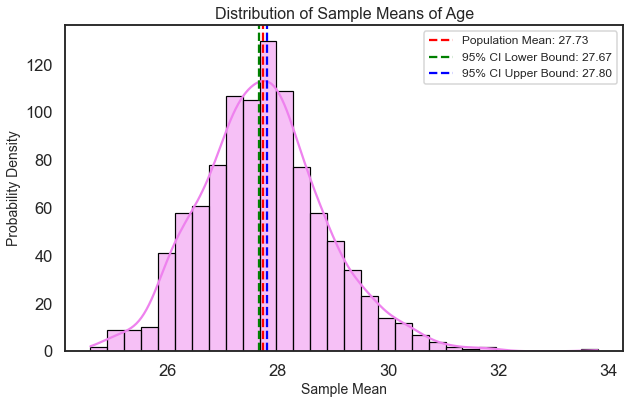

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Initializing list to store sample means
sample_means = []
sample_size = 30

# Performing bootstrapping: taking 1000 samples and calculating their means
for _ in range(1000):
    sample = np.random.choice(df["Age"], size=sample_size, replace=True)
    sample_means.append(sample.mean())

# Plotting the distribution of sample means to visualize the Central Limit Theorem in action
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='violet', edgecolor='black', linewidth=1.2)
plt.title("Distribution of Sample Means of Age", fontsize=16)
plt.xlabel("Sample Mean", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)

# Calculating the population mean of 'Age'
population_mean = df["Age"].mean()

# Setting the confidence level for the interval calculation
confidence_level = 0.95
sample_mean = np.mean(sample_means)
sample_std = np.std(df["Age"], ddof=1)
sample_size = len(df["Age"])

# Calculating the margin of error and the confidence interval
margin_of_error = norm.ppf((1 + confidence_level) / 2) * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Printing the 95% confidence interval for the mean age
print(f"95% confidence interval for age: {confidence_interval}")

# Plotting the population mean and the confidence interval bounds on the histogram
plt.axvline(population_mean, color='red', linestyle='--', label=f'Population Mean: {population_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='--', label=f'95% CI Upper Bound: {confidence_interval[1]:.2f}')
plt.legend(fontsize=12)
plt.show()

## Age Distribution Analysis via Bootstrapping

### Overview
This script analyzes age distribution by bootstrapping sample means, visualized through a histogram and supported by confidence interval calculations.

### Key Steps
- **Bootstrapping**: 1000 samples of 30 ages each are drawn from `df["Age"]`, with their means computed and stored.
- **Histogram Plotting**: A histogram of these means is plotted with seaborn, highlighting the distribution.
- **Confidence Interval**: The mean of `df["Age"]` is used along with a 95% confidence level to calculate and print the confidence interval.
- **Visualization Enhancements**: Vertical lines indicate the population mean and confidence interval bounds on the histogram.

The script efficiently demonstrates the central limit theorem in action and provides an estimation of the population mean age within a confidence range.


In [71]:
# Transform categorical variables 'Home' and 'Intent' into dummy/indicator variables for statistical analysis.
data = pd.get_dummies(df, columns=['Home', 'Intent'])

In [72]:
# Dropping the 'Id' column as it does not provide useful information for the analysis.
data = data.drop(columns=["Id"])

In [73]:
# Checking the remaining columns in the DataFrame to ensure the transformation was successful.
data.columns

Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Status',
       'Percent_income', 'Default', 'Cred_length', 'Home_MORTGAGE',
       'Home_OTHER', 'Home_OWN', 'Home_RENT', 'Intent_DEBTCONSOLIDATION',
       'Intent_EDUCATION', 'Intent_HOMEIMPROVEMENT', 'Intent_MEDICAL',
       'Intent_PERSONAL', 'Intent_VENTURE'],
      dtype='object')

In [74]:
# Importing the one-way ANOVA function from the scipy.stats library for statistical analysis.
from scipy.stats import f_oneway

# Splitting the loan amount data based on home ownership status.
loan_amt_own = data[data['Home_OWN'] == 1]["Amount"]
loan_amt_mortgage = data[data["Home_MORTGAGE"] == 1]["Amount"]
loan_amt_rent = data[data["Home_RENT"] == 1]["Amount"]

# Performing a one-way ANOVA to compare the means of loan amounts across different home ownership statuses.
f_stat, p_value = f_oneway(loan_amt_own, loan_amt_mortgage, loan_amt_rent)

# Printing the test statistics and p-value to assess if the differences between means are statistically significant.
print("Test Statistics :", f_stat)
print("P-value :", p_value)

# If the p-value is less than 0.05, we conclude that there is a significant difference in loan amounts across different home ownership statuses.
if p_value < 0.05:
    print("There is a significant difference in loan amounts among different home ownership statuses.")
else:
    print("There is no significant difference in loan amounts among different home ownership statuses.")

Test Statistics : 286.9814247253823
P-value : 2.8462280727625955e-124
There is a significant difference in loan amounts among different home ownership statuses.


In [75]:
# Mapping the 'Default' variable from 'Y' and 'N' to 1 and 0, respectively, for statistical analysis.
data["Default"] = data["Default"].map({"Y": 1, "N": 0})

In [76]:
# Converting the 'Home_MORTGAGE' dummy variable to float type to ensure data type consistency.
data["Home_MORTGAGE"] = data["Home_MORTGAGE"].astype(float)

In [77]:
# Re-checking the columns to confirm the changes.
data.columns

Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Status',
       'Percent_income', 'Default', 'Cred_length', 'Home_MORTGAGE',
       'Home_OTHER', 'Home_OWN', 'Home_RENT', 'Intent_DEBTCONSOLIDATION',
       'Intent_EDUCATION', 'Intent_HOMEIMPROVEMENT', 'Intent_MEDICAL',
       'Intent_PERSONAL', 'Intent_VENTURE'],
      dtype='object')

In [78]:
# List of parameterized columns for conversion to float
para = ["Home_OTHER", "Home_OWN", "Home_RENT", "Home_MORTGAGE", "Intent_DEBTCONSOLIDATION",
        "Intent_EDUCATION", "Intent_HOMEIMPROVEMENT", "Intent_MEDICAL", "Intent_PERSONAL", "Intent_VENTURE"]

# Convert the specified columns in 'para' to float type for consistency in data type
for i in para:
    data[i] = data[i].astype(float)

In [94]:
X=data.drop("Default",axis=1)
y=data["Default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]
results=[]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_train)
  res={
      "Model Name":type(model).__name__,
      "Accuracy":accuracy_score(y_train,y_pred),
      "Precision":precision_score(y_train,y_pred),
      "Recall":recall_score(y_train,y_pred)
  }
  results.append(res)
f=pd.DataFrame(results)
f

E:\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model Name,Accuracy,Precision,Recall
0,LogisticRegression,0.823511,0.494141,0.189419
1,SVC,0.824301,0.000000,0.000000
2,DecisionTreeClassifier,0.999562,1.000000,0.997504
3,GaussianNB,0.822985,0.489224,0.169953
4,KNeighborsClassifier,0.844471,0.664756,0.231595
5,RandomForestClassifier,0.999474,0.999001,0.998003
6,GradientBoostingClassifier,0.846882,0.575713,0.488645
7,AdaBoostClassifier,0.831272,0.520763,0.497629


In [104]:
# Replace infinite values with numerical ones, such as the mean or median
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)  # First, replace infinities with NaN
X_train.fillna(X_train.mean(), inplace=True)  # Then, handle the NaNs

In [105]:
# Check for extremely large values that could be causing issues
print(X_train.max())  # Print the maximum values in the training set to identify potential outliers

Age                             144.00
Income                      6000000.00
Emp_length                      123.00
Amount                        35000.00
Rate                             22.48
Status                            1.00
Percent_income                    0.78
Cred_length                      30.00
Home_MORTGAGE                     1.00
Home_OTHER                        1.00
Home_OWN                          1.00
Home_RENT                         1.00
Intent_DEBTCONSOLIDATION          1.00
Intent_EDUCATION                  1.00
Intent_HOMEIMPROVEMENT            1.00
Intent_MEDICAL                    1.00
Intent_PERSONAL                   1.00
Intent_VENTURE                    1.00
dtype: float64


In [106]:

X_train = X_train.astype('float64')
y_train = y_train.astype('int')  


In [107]:

print(X_train.shape, y_train.shape)


(22806, 18) (22806,)


In [108]:
# Train each model, make predictions on the training data, and store the performance metrics
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    res = {
        "Model Name": type(model).__name__,
        "Accuracy": accuracy_score(y_train, y_pred),
        "Precision": precision_score(y_train, y_pred),
        "Recall": recall_score(y_train, y_pred)
    }
    results.append(res)

# Create a DataFrame to display the results of all models
f = pd.DataFrame(results)

E:\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
#Now using Decision Tree Classifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [110]:
# Replace NaNs and infinities in the test set with numerical values
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
X_test.fillna(X_train.mean(), inplace=True)              # Replace NaNs with the mean of X_train


In [111]:
# Import the f1_score metric
from sklearn.metrics import f1_score

# Make predictions on the test set and calculate performance metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)    # Calculate accuracy
precision = precision_score(y_test, y_pred)  # Calculate precision
recall = recall_score(y_test, y_pred)        # Calculate recall
f1 = f1_score(y_test, y_pred)                # Calculate F1 score

<AxesSubplot:>

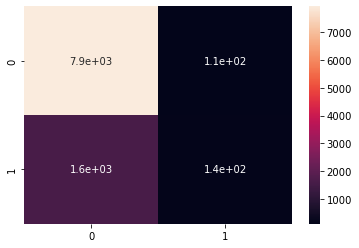

In [112]:
# Import the confusion matrix function and plot it
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm = confusion_matrix(y_test, y_pred)        # Generate the confusion matrix
sns.heatmap(cm, annot=True)                  # Visualize the confusion matrix as a heatmap

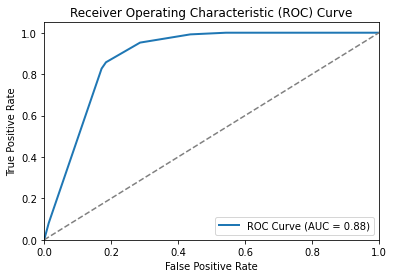

In [113]:
# Generate probability estimates for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC) for the ROC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve with the AUC value in the label
plt.plot(fpr, tpr, lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc))

# Plot the diagonal line representing the "no-skill" classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set the plot limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the axes and the plot title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add the legend to the bottom right corner of the plot
plt.legend(loc='lower right')

# Display the plot
plt.show()

## Understanding the ROC Curve

In the context of credit risk analysis, the ROC (Receiver Operating Characteristic) curve is a graphical representation that helps us determine the accuracy of our predictive models. Here’s what each part of the ROC curve tells us:

### Probability Estimates

- `y_prob = model.predict_proba(X_test)[:, 1]`
- We start by predicting the probability (`y_prob`) that each loan will default using our model.

### The ROC Curve Components

- The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
- **True Positive Rate (TPR)**: This is the ratio of correctly predicted positive observations to all actual positives. It's also known as "sensitivity" or "recall".
- **False Positive Rate (FPR)**: This is the ratio of incorrectly predicted positive observations to all actual negatives.

### The Diagonal Line

- `plt.plot([0, 1], [0, 1], color='gray', linestyle='--')`
- The diagonal gray line represents a "no-skill" classifier; one that makes random predictions. Our goal is to stay as far away from this line as possible, indicating better performance.

### AUC - Area Under the Curve

- `auc = roc_auc_score(y_test, y_prob)`
- The AUC value is the area under the ROC curve. The closer this area is to 1, the better our model is at predicting loan defaults. An AUC of 0.5 corresponds to a no-skill classifier.

### Interpreting the Curve

- A curve closer to the top-left corner indicates a model with a good measure of separability. It means the model is capable of distinguishing between classes (default vs. non-default) with high accuracy.
- The curve you see in the plot (`ROC Curve (AUC = 0.88)`) suggests that our model has a high predictive power.

### Displaying the Results

- `plt.show()`
- Finally, we display the plot to visualize our model's ability to classify the credit risk.

By analyzing the ROC curve and its AUC, we can get insights into not just how well our model is performing, but also how we might adjust our decision thresholds to optimize for either precision or recall, depending on our business objectives.



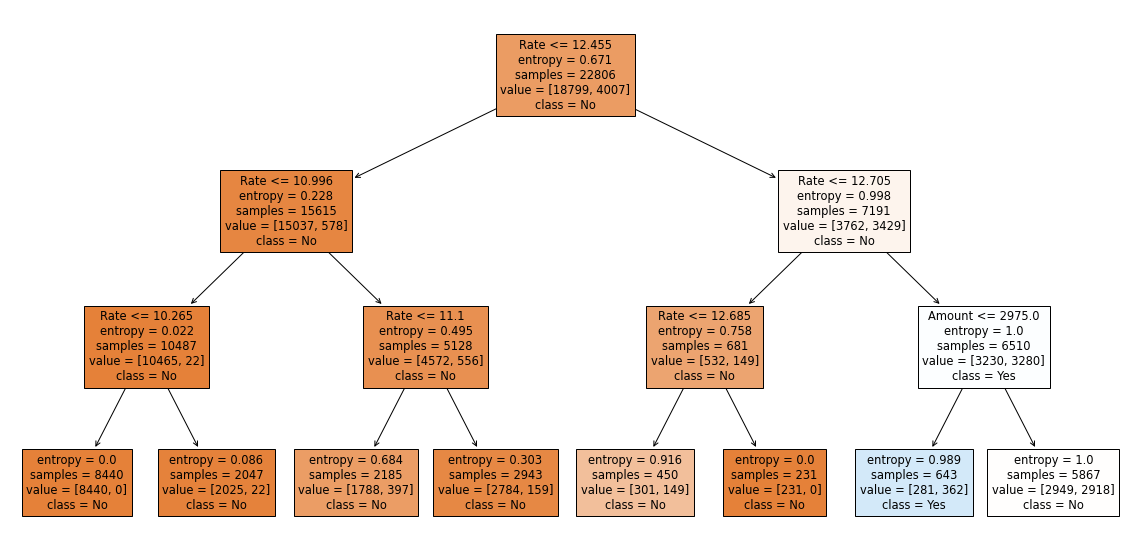

In [115]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

## Decision Tree Analysis for Credit Risk

The decision tree visualized above serves as a decision-making tool for financial institutions assessing credit risk. Let's break down how this tree can inform credit lending decisions.

### Interest Rate Node

- **Question**: "Is the loan's interest rate <= 12.455%?"
- **Observation**: Loans with lower interest rates tend to have fewer defaults.
- **Action**: Consider offering competitive rates to reliable customers to minimize risk.

### Samples Consideration

- **Data**: Nodes show the number of past loans and their outcomes, like 16215 loans with a rate <= 10.996%, mostly non-defaults.
- **Action**: Use this data to assess the risk profile of new loan applications.

### Entropy as Uncertainty Measure

- **Detail**: Low entropy (close to 0) indicates clear decisions; high entropy suggests uncertainty.
- **Action**: Be cautious with loan approvals in high entropy regions, indicating a mixed history of repayments.

### Value Counts

- **Example**: A node like "Rate <= 12.705" with a split of [3762, 3429] shows a higher risk of default.
- **Action**: Implement stricter loan conditions or additional checks for profiles falling into higher risk nodes.

### Utilizing the Tree for Strategic Decisions

- **Rate Adjustments**: Modify interest rates offered based on the associated default risk.
- **Risk Profiles**: Develop customer profiles for new clients based on historical default characteristics.
- **Policy Development**: Craft credit policies informed by the number of similar past cases and associated default rates.
- **Vigilance in Uncertainty**: Strengthen loan conditions in cases of high entropy, where the historical data indicates a higher uncertainty in loan repayments.

In essence, the decision tree helps institutions understand how different factors such as interest rates influence the likelihood of a customer defaulting on a loan, enabling informed decision-making and risk minimization.


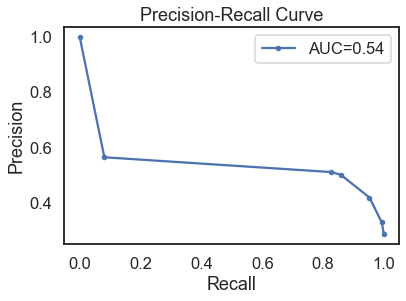

In [163]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_probs)
auc_score = auc(recall, precision)

plt.plot(recall, precision, marker='.', label=f'AUC={auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()


## Precision-Recall Curve Analysis

The figure above presents the Precision-Recall Curve for the classification model in use. This type of plot is essential for evaluating model performance in contexts where there is an imbalance in the classification categories, and precision and recall become more informative metrics than sheer accuracy.

### Precision vs. Recall

- **Precision**: Reflects the proportion of positive predictions that were actually true. In the graph, we see precision starts high and tends to decrease as recall increases.
- **Recall**: Represents the proportion of actual positive cases correctly identified by the model. The graph shows that recall increases rapidly for lower threshold values, which is desirable.

### AUC (Area Under the Curve)

- The Precision-Recall Curve provides an AUC metric of 0.54, as indicated in the graph's legend. This metric summarizes the overall model performance across all thresholds and, in this case, suggests the model is slightly above the performance of random classification, which would have an AUC of 0.5. An AUC closer to 1.0 would indicate a highly effective model.

### Interpretation

From this graph, we can infer that there is room for improvement in the model since an AUC of 0.54 implies the model has limited ability to differentiate between positive and negative classes. Strategies to enhance this could


In [166]:
df.to_csv('credit_risk_cleaned.csv', index=False)
